In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches
import seaborn as sns
%matplotlib inline

NEED TO MAKE:

Violin for Stars based on Difficulty:CHECK

Countplot for Trails based on Type: CHECK

Countplot for difficulty: CHECK

#SHOULD I CHANGE THE COLORS? Hash the double black.  I like how they match the difficulty color rating, but is it bad to have two blacks?

Histogram for Length_range: CHECK

#THIS GOES TO SHOW THAT YOU MIGHT WANT TO REMOVE ALL TRAILS LESS THAN 1 MILE, THIS WOULD TAKE THE 0-5 DOWN BY 10,000

#OR CONSIDER REMOVING ALL CONNECTORS

Histogram for distance depending on difficulty(violin plot and box plot): CHECK

#SHOULD I GET RID OF THE OUTLIERS OR NORMALIZE/SCALE THE Lengths so that these graphs don't look craycray?

#MAYBE THINK ABOUT MAKING THIS HORIZONTAL

Make distplot for ascent depending on length_range/difficulty: CHECK

Make distplot for descent depending on length_range/difficulty: CHECK

#IS THERE SOME WAY I COULD ATTACH THIS TO THE ASCENT GRAPH SO IT HAS A POSITIVE AND NEGATIVE Y AXIS


In [13]:
US_trails = pd.read_csv('../data/US_trails_engineered.csv')

In [14]:
US_trails.shape

(20691, 18)

In [15]:
US_trails.head()

,name,location,difficulty,length,ascent,descent,stars,latitude,longitude,summary,url,difficulty_encoded,category,type_Featured Ride,type_Trail,city/town,state,length_range
0,Peacock Flats,"Mokulēia, Hawaii",Double Black,22.0,3168,-3168,5.0,21.5816,-158.1929,Your reward for an arduous climb is a couple o...,https://www.mtbproject.com/trail/7028832/peaco...,6,Featured Ride,1,0,Mokulēia,Hawaii,20-25
1,Manana Out and Back,"Waimalu, Hawaii",Black,3.5,362,-361,4.0,21.4301,-157.9385,A very challenging ride and very beautiful rid...,https://www.mtbproject.com/trail/7000829/manan...,5,Featured Ride,1,0,Waimalu,Hawaii,0-5
2,Waimanalo MTB,"Waimanalo, Hawaii",Green/Blue,3.5,279,-285,3.0,21.3426,-157.7429,A short ride but on a fun sweeping trail.,https://www.mtbproject.com/trail/7001034/waima...,2,Featured Ride,1,0,Waimanalo,Hawaii,0-5
3,Kealia Trail,"Mokulēia, Hawaii",Double Black,2.8,2,-1681,5.0,21.5540,-158.2139,Try not to crash land on the airstrip below on...,https://www.mtbproject.com/trail/7029091/keali...,6,Trail,0,1,Mokulēia,Hawaii,0-5
4,Ohana Trail,"Maunawili, Hawaii",Blue,4.2,639,-773,4.7,21.3721,-157.7452,"A nice, sweeping trail near Olomana created by...",https://www.mtbproject.com/trail/7011673/ohana...,3,Trail,0,1,Maunawili,Hawaii,0-5


In [16]:
US_trails.columns

Index(['name', 'location', 'difficulty', 'length', 'ascent', 'descent',
       'stars', 'latitude', 'longitude', 'summary', 'url',
       'difficulty_encoded', 'category', 'type_Featured Ride', 'type_Trail',
       'city/town', 'state', 'length_range'],
      dtype='object')

In [17]:
US_trails['category'].value_counts()

Trail            18038
Featured Ride     2653
Name: category, dtype: int64

/Users/sarahlewis/ENTER/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


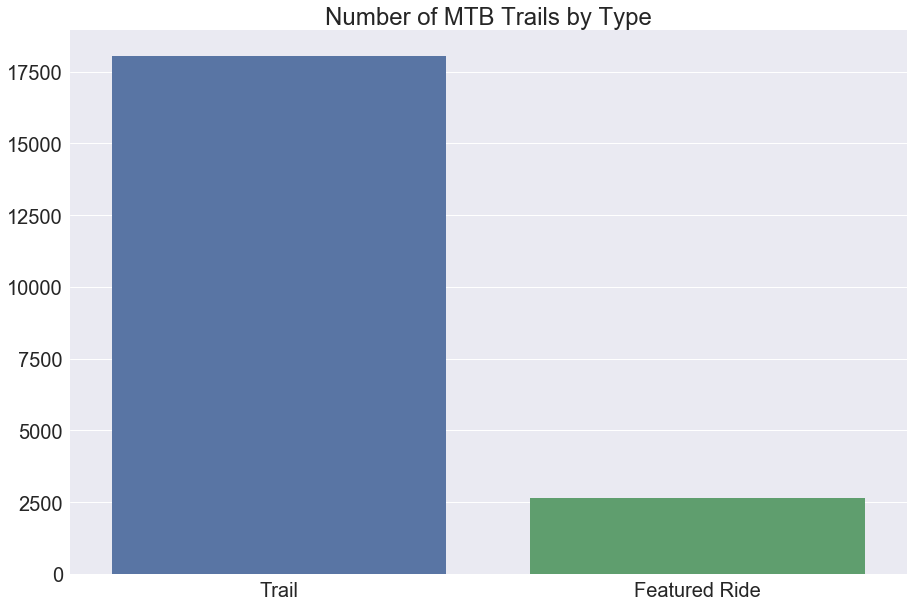

In [18]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.countplot(x="category", data=US_trails, order=['Trail', 'Featured Ride']).set_title('Number of MTB Trails by Type')
sns.set_style("darkgrid")
sns.set(font_scale = 2)
ax.set_ylabel('')    
ax.set_xlabel('')
plt.savefig('../images/MTB_trails_by_type.png', bbox_inches='tight')
plt.show()

/Users/sarahlewis/ENTER/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


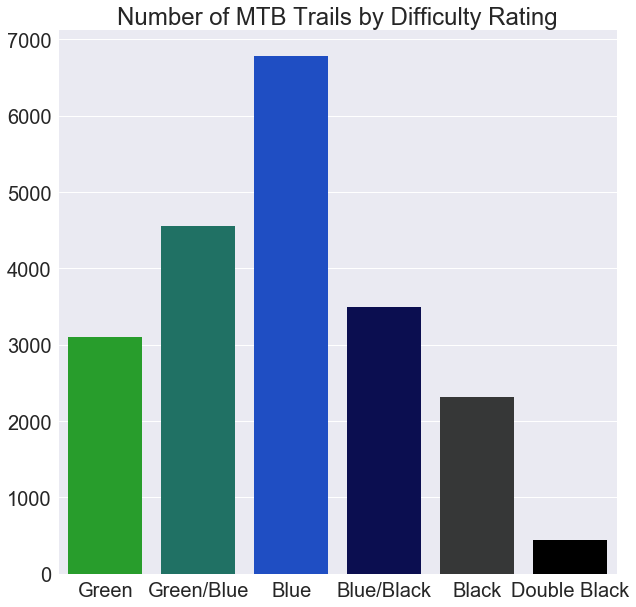

In [23]:
#SHOULD I CHANGE THE COLORS? I like how they match the difficulty color rating, but is it bad to have two blacks?
#colors = ['green', 'blue green', 'blue', 'dark blue', 'almost black', 'black']
colors = ['green', 'blue green', 'blue', 'dark blue', 'dark grey', 'black']
fig, ax = plt.subplots(figsize = (10, 10))
sns.set_style("darkgrid")
sns.set(font_scale = 2)
sns.countplot(x="difficulty", data=US_trails, order=['Green','Green/Blue','Blue','Blue/Black','Black','Double Black'], 
    palette=sns.xkcd_palette(colors)).set_title('Number of MTB Trails by Difficulty Rating')
ax.set_ylabel('')    
ax.set_xlabel('')
#plt.rcParams['hatch.color'] = '#aa007d'
#ax.patches[5].set_hatch('x')
plt.savefig('../images/Number_trails_by_difficulty.png', bbox_inches='tight')
plt.show()


In [20]:
US_trails['stars'].min()

0.0

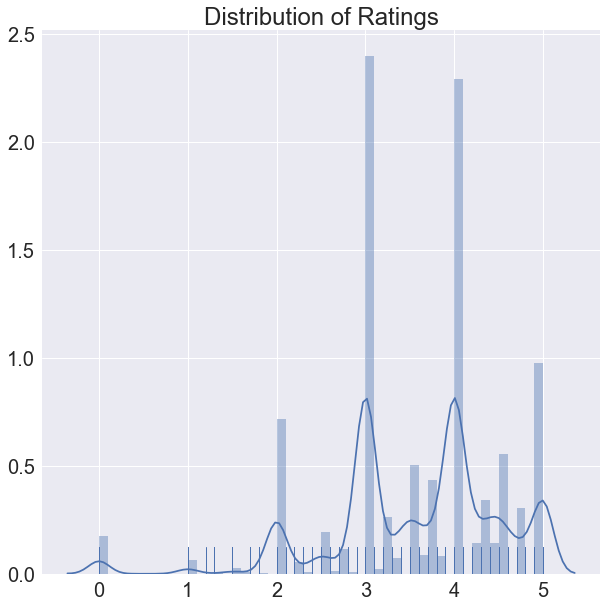

In [21]:
colors = ['green', 'blue green', 'blue', 'dark blue', 'almost black', 'black']
fig, ax = plt.subplots(figsize = (10, 10))
sns.distplot(US_trails["stars"], rug = True).set_title('Distribution of Ratings')
sns.set_style("darkgrid")
sns.set(font_scale = 2)
ax.set_ylabel('')    
ax.set_xlabel('')

/Users/sarahlewis/ENTER/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)


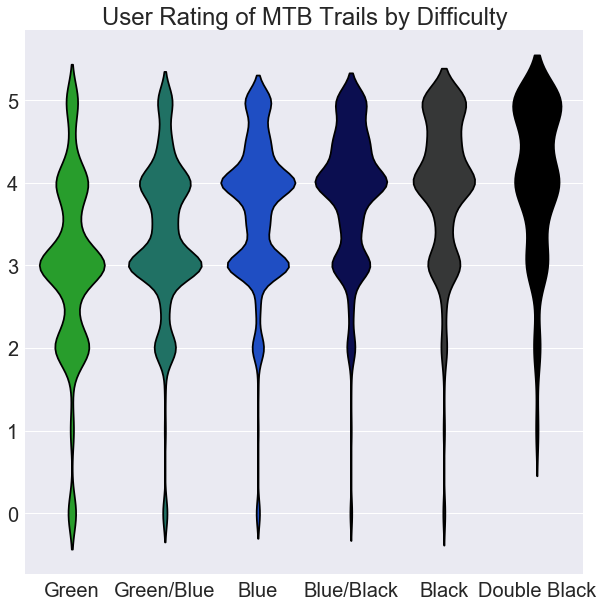

In [24]:
#This shows that the trails that have been rated the least are Green trails, and the trails that have been rated the
#highest are blue/Black trails
colors = ['green', 'blue green', 'blue', 'dark blue', 'dark grey', 'black']
fig, ax = plt.subplots(figsize = (10, 10))
sns.violinplot(x="difficulty", y="stars", data=US_trails, order=['Green','Green/Blue','Blue','Blue/Black','Black','Double Black'], 
    palette=sns.xkcd_palette(colors),inner=None).set_title('User Rating of MTB Trails by Difficulty')
sns.set_style("darkgrid")
sns.set(font_scale = 2)
#plt.rcParams['hatch.color'] = '#aa007d'
#ax.patches[1].set_hatch('x')
ax.set_ylabel('')    
ax.set_xlabel('')
plt.savefig('../images/User_rating_by_difficulty.png', bbox_inches='tight')
plt.show()

In [25]:
US_trails['length_range'].unique().tolist()

['20-25', '0-5', '15-20', '5-10', '10-15', '25-30', '30+']

/Users/sarahlewis/ENTER/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


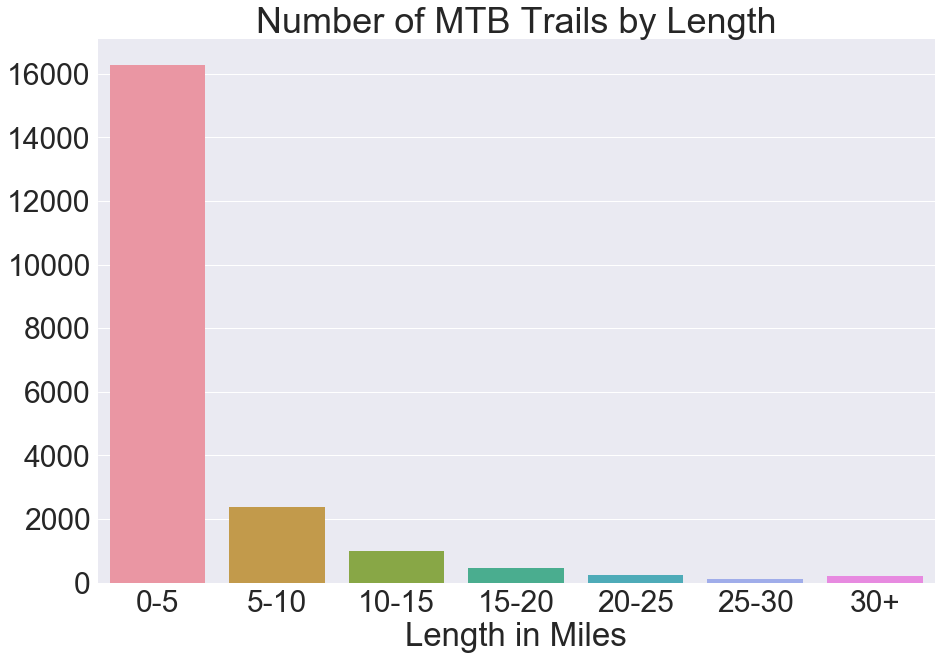

In [27]:
#THIS GOES TO SHOW THAT YOU MIGHT WANT TO REMOVE ALL TRAILS LESS THAN 1 MILE, THIS WOULD TAKE THE 0-5 DOWN BY 10,000
#OR CONSIDER REMOVING ALL CONNECTORS
fig, ax = plt.subplots(figsize = (15, 10))
sns.countplot(x="length_range", data=US_trails, order = ['0-5','5-10','10-15','15-20','20-25','25-30','30+']
             ).set_title('Number of MTB Trails by Length')
sns.set_style("darkgrid")
sns.set(font_scale = 3)
#plt.rcParams['hatch.color'] = '#aa007d'
#ax.patches[5].set_hatch('x')
ax.set_ylabel('')    
ax.set_xlabel('Length in Miles')
plt.savefig('../images/Number_trails_by_length.png', bbox_inches='tight')
plt.show()


/Users/sarahlewis/ENTER/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)


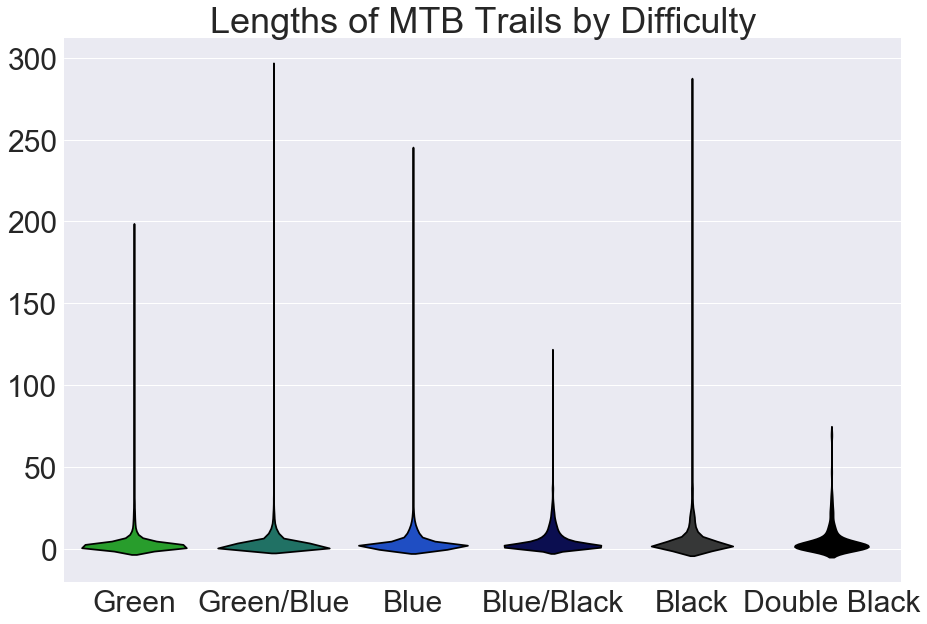

In [28]:
#SHOULD I GET RID OF THE OUTLIERS OR NORMALIZE/SCALE THE Lengths so that these graphs don't look craycray?
#MAYBE THINK ABOUT MAKING THIS HORIZONTAL
#colors = ['green', 'blue green', 'blue', 'dark blue', 'almost black', 'black']
colors = ['green', 'blue green', 'blue', 'dark blue', 'dark grey', 'black']
fig, ax = plt.subplots(figsize = (15, 10))
sns.violinplot(x="difficulty", y="length", data=US_trails, order=['Green','Green/Blue','Blue','Blue/Black','Black','Double Black'], 
    palette=sns.xkcd_palette(colors),inner=None).set_title('Lengths of MTB Trails by Difficulty')
sns.set_style("darkgrid")
sns.set(font_scale = 2)
#plt.rcParams['hatch.color'] = '#aa007d'
#ax.patches.set_hatch('x')
ax.set_ylabel('')    
ax.set_xlabel('')


/Users/sarahlewis/ENTER/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


IndexError: list index out of range

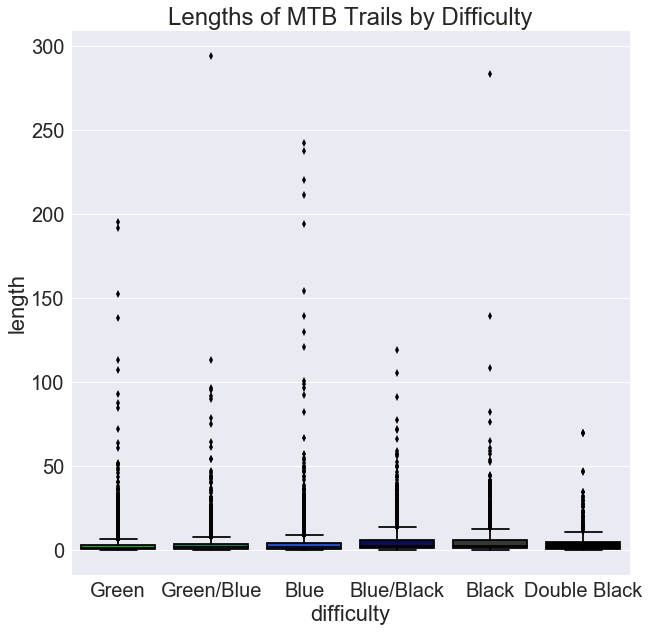

In [29]:
#I LIKE THAT THIS ACTUALLY SHOWS THE OUTLIERS BUT STILL, THEY ARE A LITTLE OVERWHELMING
colors = ['green', 'blue green', 'blue', 'dark blue', 'dark grey', 'black']
#colors = ['green', 'blue green', 'blue', 'dark blue', 'almost black', 'black']
fig, ax = plt.subplots(figsize = (10, 10))
sns.boxplot(x="difficulty", y="length", data=US_trails, order=['Green','Green/Blue','Blue','Blue/Black','Black','Double Black'], 
    palette=sns.xkcd_palette(colors)).set_title('Lengths of MTB Trails by Difficulty')
sns.set_style("darkgrid")
sns.set(font_scale = 2)
plt.rcParams['hatch.color'] = '#aa007d'
ax.patches[5].set_hatch('x')
ax.set_ylabel('')    
ax.set_xlabel('')

/Users/sarahlewis/ENTER/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)


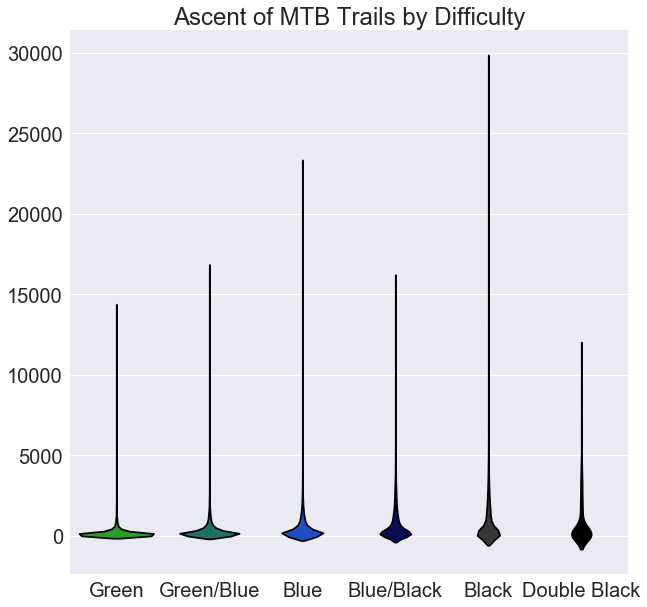

In [30]:
#SHOULD I GET RID OF THE OUTLIERS OR NORMALIZE/SCALE THE Lengths so that these graphs don't look craycray?
#MAYBE THINK ABOUT MAKING THIS HORIZONTAL
#colors = ['green', 'blue green', 'blue', 'dark blue', 'almost black', 'black']
colors = ['green', 'blue green', 'blue', 'dark blue', 'dark grey', 'black']
fig, ax = plt.subplots(figsize = (10, 10))
sns.violinplot(x="difficulty", y="ascent", data=US_trails, order=['Green','Green/Blue','Blue','Blue/Black','Black','Double Black'], 
    palette=sns.xkcd_palette(colors),inner=None).set_title('Ascent of MTB Trails by Difficulty')
sns.set_style("darkgrid")
sns.set(font_scale = 2)
#plt.rcParams['hatch.color'] = '#aa007d'
#ax.patches[5].set_hatch('x')
ax.set_ylabel('')    
ax.set_xlabel('')


/Users/sarahlewis/ENTER/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


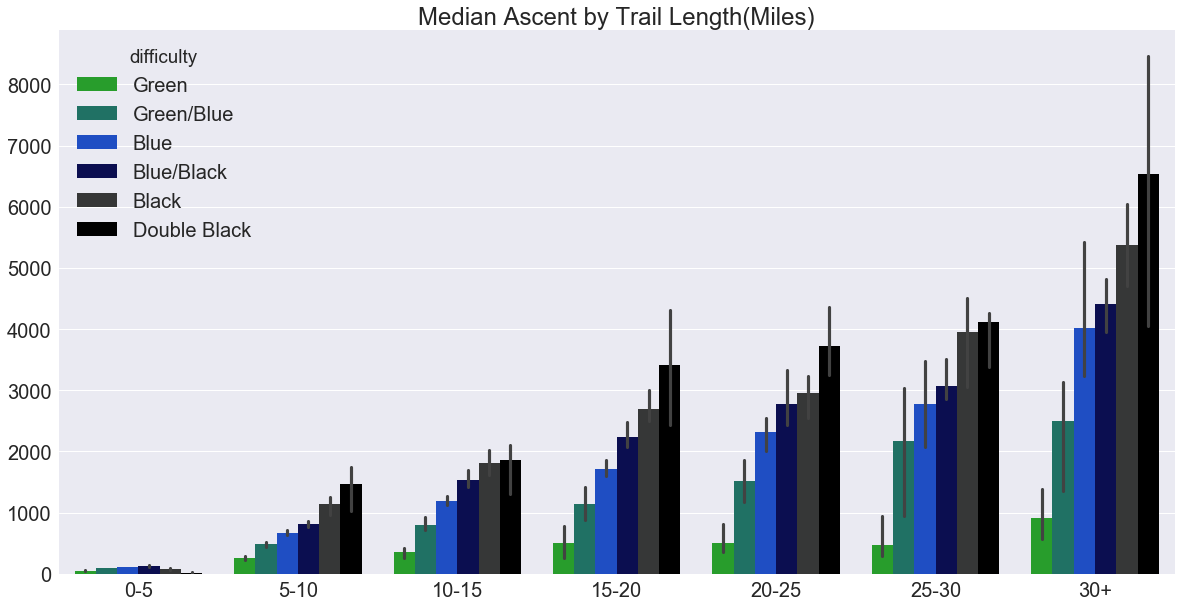

"\n# Define some hatches\nhatches = ['-', '+', 'x', '\\', '*', 'o']\n\n# Loop over the bars\nfor i,thisbar in enumerate(bar.patches):\n    # Set a different hatch for each bar\n    thisbar.set_hatch(hatches[i])\n"

In [40]:
#This shows that as length increases, ascent increases, but that for the most part within each length range,
#the ascent is in order of difficulty; this makes sense that green trails have less ascent than others
#colors = ['green', 'blue green', 'blue', 'dark blue', 'almost black', 'black']
colors = ['green', 'blue green', 'blue', 'dark blue', 'dark grey', 'black']
fig, ax = plt.subplots(figsize = (20, 10))
bar = sns.barplot(x="length_range", y="ascent", hue="difficulty", data=US_trails, estimator = np.median, 
    order = ['0-5','5-10','10-15','15-20','20-25','25-30','30+'], 
    hue_order=['Green','Green/Blue','Blue','Blue/Black','Black','Double Black'],
    palette=sns.xkcd_palette(colors))
sns.set_style("darkgrid")
sns.set(font_scale = 2)
#plt.rcParams['hatch.color'] = '#aa007d'
#ax.patches[5:5].set_hatch('x')
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title('Median Ascent by Trail Length(Miles)')
plt.savefig('../images/Ascent_by_length_difficulty.png', bbox_inches='tight')
plt.show()
'''
# Define some hatches
hatches = ['-', '+', 'x', '\\', '*', 'o']

# Loop over the bars
for i,thisbar in enumerate(bar.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])
'''


/Users/sarahlewis/ENTER/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


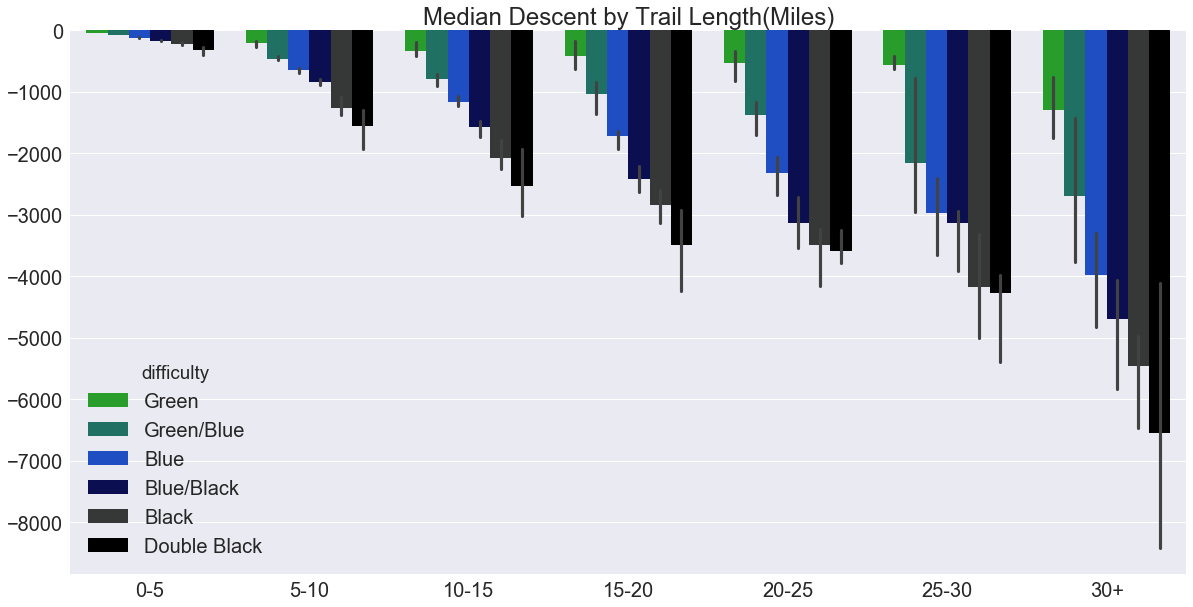

In [41]:
#IS THERE SOME WAY I COULD ATTACH THIS TO THE ASCENT GRAPH SO IT HAS A POSITIVE AND NEGATIVE Y AXIS
#This shows that as length increases, ascent increases, but that for the most part within each length range,
#the ascent is in order of difficulty; this makes sense that green trails have less ascent than others
#colors = ['green', 'blue green', 'blue', 'dark blue', 'almost black', 'black']
colors = ['green', 'blue green', 'blue', 'dark blue', 'dark grey', 'black']
fig, ax = plt.subplots(figsize = (20, 10))
sns.barplot(x="length_range", y="descent", hue="difficulty", data=US_trails, estimator = np.median,
    order = ['0-5','5-10','10-15','15-20','20-25','25-30','30+'], 
    hue_order=['Green','Green/Blue','Blue','Blue/Black','Black','Double Black'],
    palette=sns.xkcd_palette(colors))
sns.set_style("darkgrid")
sns.set(font_scale = 2)
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title('Median Descent by Trail Length(Miles)')
plt.savefig('../images/Descent_by_length_difficulty.png', bbox_inches='tight')
plt.show()

In [34]:
US_trails.dtypes

name                   object
location               object
difficulty             object
length                float64
ascent                  int64
descent                 int64
stars                 float64
latitude              float64
longitude             float64
summary                object
url                    object
difficulty_encoded      int64
category               object
type_Featured Ride      int64
type_Trail              int64
city/town              object
state                  object
length_range           object
dtype: object

In [35]:
quantitative_columns = list(US_trails.select_dtypes(exclude=['object']).columns)
quantitative_columns

['length',
 'ascent',
 'descent',
 'stars',
 'latitude',
 'longitude',
 'difficulty_encoded',
 'type_Featured Ride',
 'type_Trail']

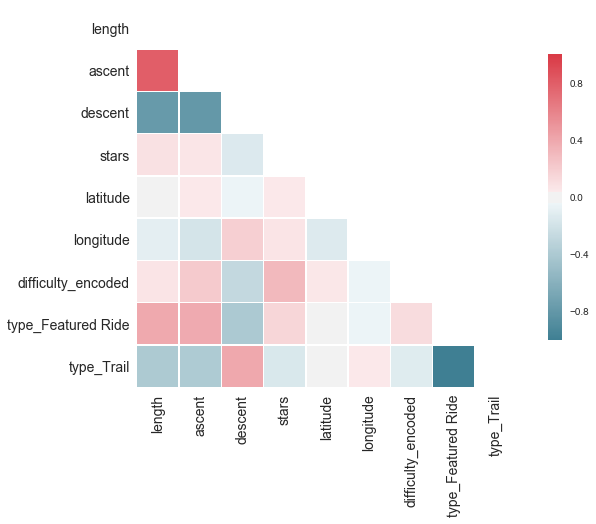

In [42]:
#THIS GOES TO SHOW THAT LENGTH AND ASCENT ARE POSITIVELY CORRELATED
#LENGTH/DESCENT, ASCENT/DESCENT, STARS/TYPE_CONNECTOR ARE NEGATIVELY CORRELATED
corr = US_trails[quantitative_columns].corr() #computes pairwise correlation of columns
sns.set(style="white") #sets aesthetic parameters in one step
mask = np.zeros_like(corr, dtype=np.bool) #creates an array with the same size as corr, fills it with zeros, and makes the dtypes boolean
mask[np.triu_indices_from(mask)] = True #fills the indices for the upper-triangle of mask with true
f, ax = plt.subplots(figsize=(11, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True) #returns a matplotlib color palette object
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
square=True, yticklabels = True, linewidths=.5, cbar = True, cbar_kws={"shrink": .75})
#since mask is true, data will not be shown in cells where mask is True
#the cmap is the mapping from data values to color space
#vmax are the values to anchor the colormap
#center is the value at which to center the colormap when plotting divergent data
#square sets the axes aspect to equal so each cell will be square-shaped
#linewidths is the width of the lines that will divide each cell
#cbar_kws is the keyword arguments for fig.colorbar so it shrinks the colorbar on the right to half its size
plt.yticks(fontsize = 14, rotation='horizontal') #makes the ylabels horizontal
plt.xticks(fontsize = 14, rotation=90) #makes the xlabels vertical
plt.savefig('../images/Heatmap_quantitative_columns.png', bbox_inches='tight')
plt.show()
#sns.heatmap(US_trails[quantitative_columns])